In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.spatial
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [2]:
match_rep_df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/checkpoints/match_rep_df.csv")

In [3]:

# Convert string settings to numerical

def get_similar_rows(df, row_index, threshold):
    """
    For a given profile, find the most similar other rows based 
    on Euclidean distance. Rows above the threshold will be discarded

    DataFrame strings will be converted to numerical 

    ignore_cols will not be used for calculating distance, but will be returned in the final
    output 
    """
    data = df.copy()
    numerical_df = pd.DataFrame()

    comparison_cols = [
        "aperture",
        "Magnification",
        "Modality",
        "Binning",
        "Number_of_channels",
        "z_plane",
        "spinning-disc",
        "dry-immersion",
        "vs-brightfield",
        "simultaneous-excitation",
        "sites",
    ]

    drop_cols = [i for i in df.columns if i not in comparison_cols]

    display_cols = ["Vendor", "Assay_Plate_Barcode", "Batch"] + comparison_cols + ["Percent_Replicating", "Percent_Matching", "cell_count", "euclidean_distance"]

    data_dropped = data.drop(drop_cols, axis=1)

    lab = LabelEncoder()
    # Convert settings to be compared to categorical values
    for col in data_dropped.columns:
        lab.fit(data_dropped[col])
        numerical_df[col] = lab.transform(data_dropped[col])

    distances = scipy.spatial.distance.cdist(numerical_df, numerical_df, metric='euclidean')

    row = np.where(distances[row_index] > threshold, distances[row_index], 0)

    # Find indices of rows that have a distance below the threshold
    ind = np.argwhere(row==0).reshape(-1)

    # Get the relative distances for output
    comparison_distances = distances[row_index][ind]

    # Subset the data to have rows that are below the distance threshold
    data = data.iloc[ind,:]

    data["euclidean_distance"] = comparison_distances

    data = data.sort_values(by=["euclidean_distance"])

    return data[display_cols]

df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()


get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("20201021T092317")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

get_similar_rows(df, get_ind, 4)
# get_similar_rows(df, 25, 5, str_convert, drop_cols)[display_cols]

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Percent_Replicating,Percent_Matching,cell_count,euclidean_distance
45,Yokogawa_Japan,20201021T092317,Scope1_Yokogawa_Japan_20X,0.75,20,Confocal,1,5,10,NaN,dry,NaN,NaN,9,64.444444,23.255814,1250600,0.000000
3,MolDev,Plate3_PCO_6ch_4site_20XPA_Crestz,Scope1_MolDev_20X_4site,0.75,20,Confocal,1,6,3,yes,dry,NaN,NaN,4,57.777778,18.604651,527841,2.000000
2,MolDev,Plate3_PCO_6ch_4site_10XPA_Crestz,Scope1_MolDev_10X_4siteZ,0.45,10,Confocal,1,6,3,yes,dry,NaN,NaN,4,66.666667,23.255814,2381443,2.449490
5,MolDev,Plate3_PCO_6ch_9site_20XPA_Crest,Scope1_MolDev_20X_9site,0.75,20,Confocal,1,6,1,yes,dry,NaN,NaN,9,58.888889,20.930233,1253387,2.449490
10,Nikon,BR00117061a,Scope1_Nikon_20X,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9,65.555556,23.255814,2330204,2.449490
11,Nikon,BR00117062a,Scope1_Nikon_20X,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9,55.555556,18.604651,2301607,2.449490
12,Nikon,BR00117063b,Scope1_Nikon_20X,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9,51.111111,18.604651,2274867,2.449490
1,MolDev,Plate3_PCO_6ch_4site_10XPA_Crest,Scope1_MolDev_10X,0.45,10,Confocal,1,6,1,yes,dry,NaN,NaN,4,62.222222,18.604651,2413350,3.000000
4,MolDev,Plate2_PCO_6ch_9site_20XPA,Scope1_MolDev_20X_9site,0.75,20,Confocal,1,6,1,no,dry,NaN,NaN,9,67.777778,23.255814,1101611,3.000000
51,Yokogawa_US,BRO0117059_20X,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,1.00,20,Confocal,1,6,12,NaN,water,yes,4.0,9,61.111111,23.255814,1136319,3.000000


<AxesSubplot:>

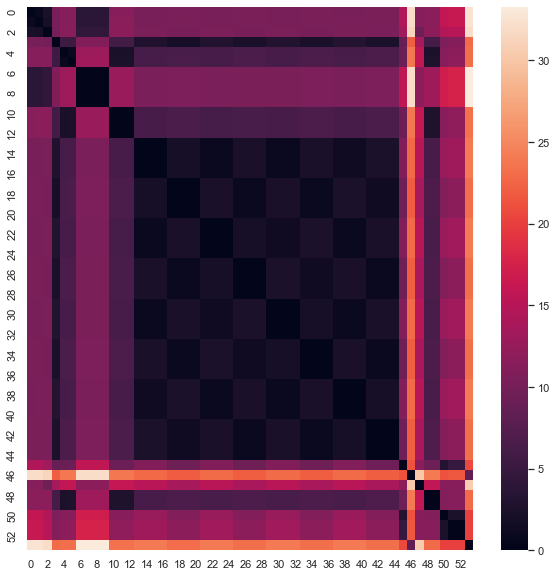

In [8]:
setting_df = df[comparison_cols]

numerical_df = to_numerical(setting_df, str_convert)

comparison = scipy.spatial.distance.cdist(numerical_df, numerical_df)

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(comparison, ax=ax)

In [26]:
subset_df = match_rep_df[
    ~match_rep_df["Batch"].str.contains("siteSub") &
    match_rep_df["sphering"] == True].reset_index()

comparison_cols = [
    "aperture",
    "Magnification",
    "Modality",
    "Binning",
    "Number_of_channels",
    "z_plane",
    "spinning-disc",
    "dry-immersion",
    "vs-brightfield",
    "simultaneous-excitation",
    "sites",
]

display_cols = ["Vendor", "Assay_Plate_Barcode", "Batch"] + comparison_cols + ["Percent_Replicating", "euclidean_distance"]

df_list = list()
for barcode, batch in zip(subset_df["Assay_Plate_Barcode"], subset_df["Batch"]):
    get_ind = subset_df.index[subset_df["Assay_Plate_Barcode"].str.contains(barcode) &
                                subset_df["Batch"].str.contains(batch)][0]
    df_list.append(get_similar_rows(subset_df, get_ind, 2, drop_cols)[display_cols])
    

# Find intra and inter vendor comparisons based on euclidean distance

- Inter
  - Find within vendors the lowest euclidean distances
    - How to drop DF that just show row rearrangements with the same distance?

In [28]:
for i in df_list:
    # print(i)
    i.reset_index(inplace=True, drop=True)

In [31]:
pd.concat(df_list).to_csv("euclidean_comparisons.csv")

# Other figures that are more isolated
## Plates to compare:
- Plate3_PCO_6ch_4site_20XPA_Crestz
- Plate3_PCO_6ch_9site_20XPA_Crest
- CP_Broad_Phenix_C_BIN1_1Plane_P4
  - Accuracy between 4 replicates
    - Demonstrate robustness of assay within one system
- BR00117063b
  - Another example of the above
- BRO01177034_20x or BRO0117059_20X vs BRO0117059_40x
  - 20x vs 40x at 4x simultaneous excitation
- BRO0117056_20x vs BRO0117033_20xb
  - Yokogawa intra vendor replication. These plate settings are identical
- BRO0117056_20xb
  - Compare one of the above with this plate. 1 z-plane vs 12. All other settings the same.
- BRO0117056_20xb vs BRO01177034_20x or BRO0117059_20X
  - 4x excitation vs 2x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'aperture': 0.45, 'Magnification': 10.0}
{'aperture': 0.75, 'Magnification': 20.0}


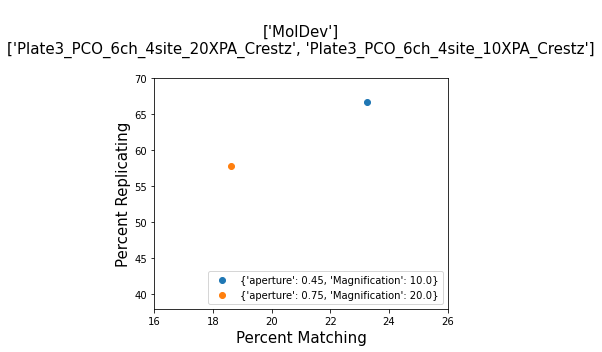

In [48]:
%load_ext autoreload
%autoreload 2
import utilssphering

# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("Plate3_PCO_6ch_4site_20XPA_Crestz")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2)[:2]

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
{df_subset["Vendor"].unique()}
{[i for i in df_subset["Assay_Plate_Barcode"]]}
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

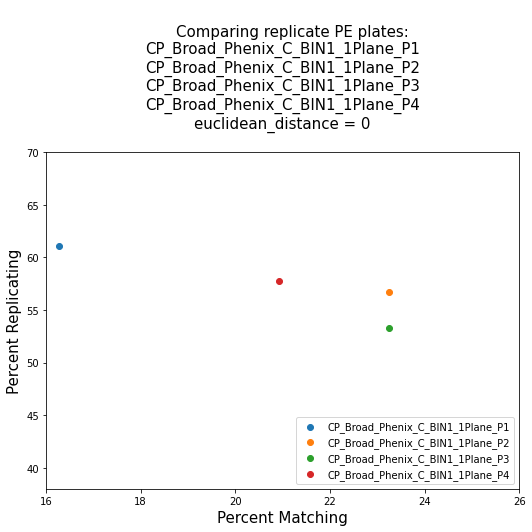

In [72]:

# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("CP_Broad_Phenix_C_BIN1_1Plane_P4")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2)[:4]

fig, ax = plt.subplots(figsize=(7.5,7.5))

nl = '\n'

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    # infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
    Comparing replicate PE plates:
{nl.join([i for i in df_subset["Assay_Plate_Barcode"]])}
euclidean_distance = 0
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

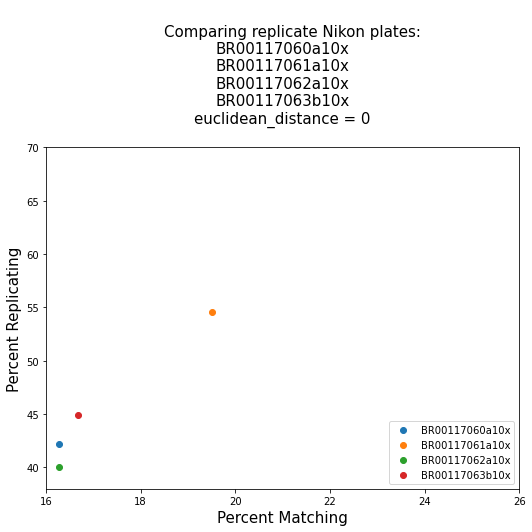

In [79]:

# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BR00117063b")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2)[:6]

fig, ax = plt.subplots(figsize=(7.5,7.5))

nl = '\n'

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    # infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
    Comparing replicate Nikon plates:
{nl.join([i for i in df_subset["Assay_Plate_Barcode"]])}
euclidean_distance = 0
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

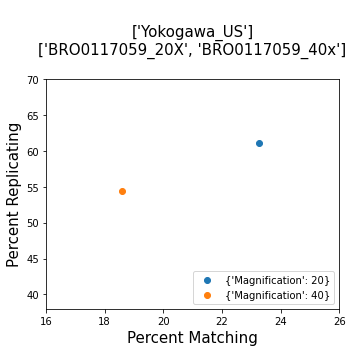

In [92]:
# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO01177034_20x")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2).iloc[[0, 2]]

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
{df_subset["Vendor"].unique()}
{[i for i in df_subset["Assay_Plate_Barcode"]]}
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

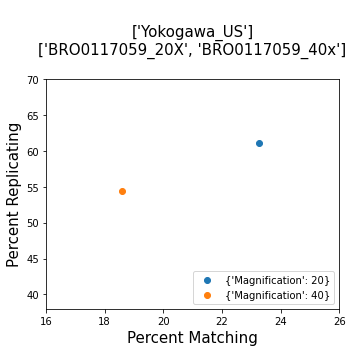

In [96]:
# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO01177034_20x")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2).iloc[[0, 2]]

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
{df_subset["Vendor"].unique()}
{[i for i in df_subset["Assay_Plate_Barcode"]]}
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

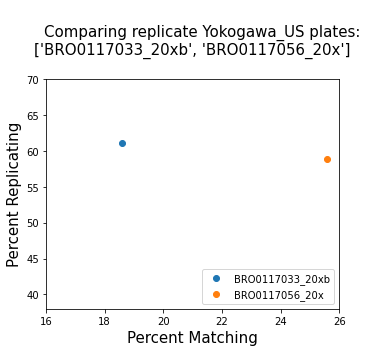

In [7]:
# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO0117056_20x")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 2)
df_subset

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    # infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
    Comparing replicate Yokogawa_US plates:
{[i for i in df_subset["Assay_Plate_Barcode"]]}
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

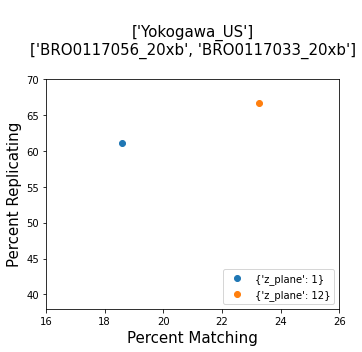

In [12]:


# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO0117056_20xb")][0]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 4).iloc[[0, 4]]
df_subset

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
{df_subset["Vendor"].unique()}
{[i for i in df_subset["Assay_Plate_Barcode"]]}
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

In [13]:
get_similar_rows(df, get_ind, 4)

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Percent_Replicating,Percent_Matching,cell_count,euclidean_distance
50,Yokogawa_US,BRO0117056_20xb,Scope1_Yokogawa_US_20X_5Ch_12Z,1.00,20,Confocal,1,5,12,NaN,water,no,2.0,9,66.666667,23.255814,1193638,0.000000
51,Yokogawa_US,BRO0117059_20X,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,1.00,20,Confocal,1,6,12,NaN,water,yes,4.0,9,61.111111,23.255814,1136319,1.732051
52,Yokogawa_US,BRO01177034_20x,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,1.00,20,Confocal,1,6,12,NaN,water,yes,4.0,9,58.888889,18.604651,1045379,1.732051
53,Yokogawa_US,BRO0117059_40x,Scope1_Yokogawa_US_40X_BRO0117059,1.00,40,Confocal,1,6,12,NaN,water,yes,4.0,9,54.444444,18.604651,279900,2.000000
48,Yokogawa_US,BRO0117033_20xb,Scope1_Yokogawa_US_20X_5Ch,1.00,20,Confocal,1,5,1,NaN,water,no,2.0,9,61.111111,18.604651,1096617,3.000000
49,Yokogawa_US,BRO0117056_20x,Scope1_Yokogawa_US_20X_5Ch,1.00,20,Confocal,1,5,1,NaN,water,no,2.0,9,58.888889,25.581395,1191329,3.000000
45,Yokogawa_Japan,20201021T092317,Scope1_Yokogawa_Japan_20X,0.75,20,Confocal,1,5,10,NaN,dry,NaN,NaN,9,64.444444,23.255814,1250600,3.741657
17,PE,CP_Broad_Phenix_C_BIN1_P1,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,58.888889,20.930233,359818,4.000000
18,PE,CP_Broad_Phenix_C_BIN1_P2,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,23.255814,368742,4.000000
19,PE,CP_Broad_Phenix_C_BIN1_P3,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,18.604651,370393,4.000000


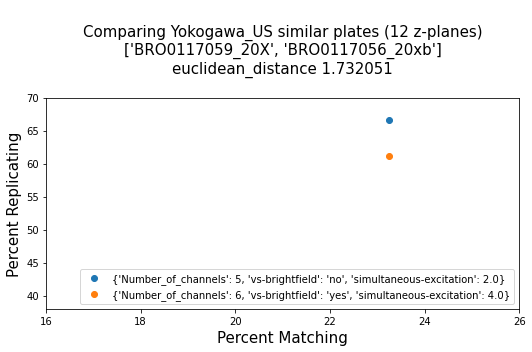

In [31]:
# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO01177034_20x")][0]
# get_ind = df.index[~df["simultaneous-excitation"].isnull()][1]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 4).iloc[[0, 3]]
df_subset

fig, ax = plt.subplots(figsize=(7.5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
Comparing Yokogawa_US similar plates (12 z-planes)
{[i for i in df_subset["Assay_Plate_Barcode"]]}
euclidean_distance 1.732051
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

# All 4x simultaneous excitation profiles have 12z planes

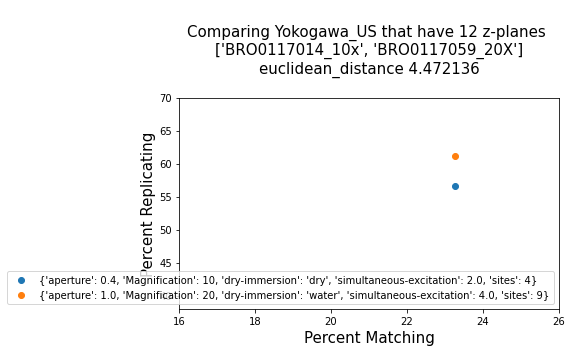

In [37]:
# Define DF without batch and with sphering
df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

# Get plate index
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO0117014_10x")][0]
# get_ind = df.index[~df["simultaneous-excitation"].isnull()][1]
# get_ind = df.index[df["sites"].astype('str').str.contains("9")][11]
# get_ind = df.index[df["z_plane"].astype('str').str.contains("12")][5]

df_subset = get_similar_rows(df, get_ind, 10).iloc[[0, 6]]
df_subset

fig, ax = plt.subplots(figsize=(7.5,5))

utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=["Assay_Plate_Barcode"],
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    infer_custom_legend=True,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title=f"""
Comparing Yokogawa_US that have 12 z-planes 
{[i for i in df_subset["Assay_Plate_Barcode"]]}
euclidean_distance 4.472136
""",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

In [44]:
# The euclidean distance between 2x and 4x simultaneous excitation is low
get_ind = df.index[~df["simultaneous-excitation"].isnull()][1]

# df_subset = get_similar_rows(df, get_ind, 10).iloc[[0, -5]]
df_subset = get_similar_rows(df, get_ind, 10)
df_subset

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Percent_Replicating,Percent_Matching,cell_count,euclidean_distance
49,Yokogawa_US,BRO0117056_20x,Scope1_Yokogawa_US_20X_5Ch,1.00,20,Confocal,1,5,1,NaN,water,no,2.0,9,58.888889,25.581395,1191329,0.000000
48,Yokogawa_US,BRO0117033_20xb,Scope1_Yokogawa_US_20X_5Ch,1.00,20,Confocal,1,5,1,NaN,water,no,2.0,9,61.111111,18.604651,1096617,0.000000
50,Yokogawa_US,BRO0117056_20xb,Scope1_Yokogawa_US_20X_5Ch_12Z,1.00,20,Confocal,1,5,12,NaN,water,no,2.0,9,66.666667,23.255814,1193638,3.000000
14,PE,CP_Broad_Phenix_C_BIN1_1Plane_P2,Scope1_PE_Bin1_Confocal_1Plane,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3,56.666667,23.255814,368727,3.464102
51,Yokogawa_US,BRO0117059_20X,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,1.00,20,Confocal,1,6,12,NaN,water,yes,4.0,9,61.111111,23.255814,1136319,3.464102
15,PE,CP_Broad_Phenix_C_BIN1_1Plane_P3,Scope1_PE_Bin1_Confocal_1Plane,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3,53.333333,23.255814,369895,3.464102
52,Yokogawa_US,BRO01177034_20x,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,1.00,20,Confocal,1,6,12,NaN,water,yes,4.0,9,58.888889,18.604651,1045379,3.464102
16,PE,CP_Broad_Phenix_C_BIN1_1Plane_P4,Scope1_PE_Bin1_Confocal_1Plane,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3,57.777778,20.930233,416408,3.464102
13,PE,CP_Broad_Phenix_C_BIN1_1Plane_P1,Scope1_PE_Bin1_Confocal_1Plane,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3,61.111111,16.279070,359491,3.464102
19,PE,CP_Broad_Phenix_C_BIN1_P3,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,18.604651,370393,3.605551


In [47]:
get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("20201020T134356")][0]
df_subset = get_similar_rows(df, get_ind, 10)
df_subset

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Percent_Replicating,Percent_Matching,cell_count,euclidean_distance
46,Yokogawa_Japan,20201020T134356,Scope1_Yokogawa_Japan_40X,0.95,40,Confocal,1,5,12,NaN,dry,no,NaN,2,48.888889,18.604651,59164,0.000000
17,PE,CP_Broad_Phenix_C_BIN1_P1,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,58.888889,20.930233,359818,3.464102
19,PE,CP_Broad_Phenix_C_BIN1_P3,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,18.604651,370393,3.464102
20,PE,CP_Broad_Phenix_C_BIN1_P4,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,23.255814,416634,3.464102
18,PE,CP_Broad_Phenix_C_BIN1_P2,Scope1_PE_Bin1_Confocal_3Plane,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3,57.777778,23.255814,368742,3.464102
25,PE,CP_Broad_Phenix_NC_BIN1_P1,Scope1_PE_Bin1_Widefield_3Plane,1.00,20,Widefield,1,5,3,NaN,water,NaN,NaN,3,58.888889,18.604651,351966,3.605551
27,PE,CP_Broad_Phenix_NC_BIN1_P3,Scope1_PE_Bin1_Widefield_3Plane,1.00,20,Widefield,1,5,3,NaN,water,NaN,NaN,3,61.111111,20.930233,361578,3.605551
28,PE,CP_Broad_Phenix_NC_BIN1_P4,Scope1_PE_Bin1_Widefield_3Plane,1.00,20,Widefield,1,5,3,NaN,water,NaN,NaN,3,57.777778,20.930233,403624,3.605551
33,PE,CPBroadPhenixCP1,Scope1_PE_Bin2_Confocal_3Plane,1.00,20,Confocal,2,5,3,NaN,water,NaN,NaN,3,58.888889,16.279070,347894,3.605551
26,PE,CP_Broad_Phenix_NC_BIN1_P2,Scope1_PE_Bin1_Widefield_3Plane,1.00,20,Widefield,1,5,3,NaN,water,NaN,NaN,3,57.777778,23.255814,360334,3.605551
